In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import cv2

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train=",x_train.shape)
print("y_train=",y_train.shape)
print("x_tes=",x_test.shape)
print("y_test=",y_test.shape)
#print([i.shape for i in (x_train, y_train, x_test, y_test)])



x_train= (60000, 28, 28)
y_train= (60000,)
x_tes= (10000, 28, 28)
y_test= (10000,)


This means that are total 70000 images. Out of them 60000 are for training purpose and 10000 are for testing purpose. The dataset seems like as shown in image 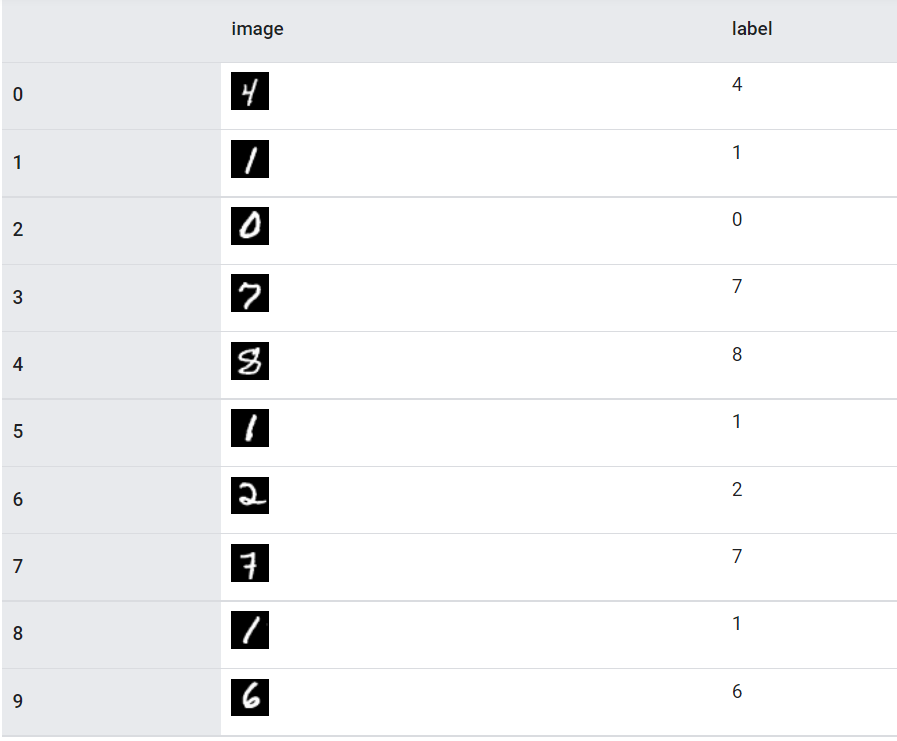

In [45]:
x_train[1] # If we want to see the second image (it starts from 0 so) in X_train
cv2.imshow('image',x_train[1]) # You can view that image
cv2.waitKey(0)

-1

In [4]:
x_train[1].shape # gives the size of x_train[1] image

(28, 28)

In [46]:
y_train[1] # Y means class label data. So it will display the class label of x_train[1]. We have already view the image and here also it si confirmed now

0

In [47]:
#This we perform to have the data in 0 to 1 range. any image data ranges from 0-255.
# So if i divide each pixel by 255 so highest would be 255/255 that is 1 and other will be less than 0
x_train=x_train/255
x_test=x_test/255

In [48]:
# to check the effect of above code
x_test[1] # Now you can see in output all the values are between 0 to 1 only

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
x_train.shape

(60000, 28, 28)

In [50]:
x_train=x_train.reshape(-1,28,28,1) #converts 2D array into 1 D
## -1 for input x_train specifies that this dimension should be dynamically computed based on the number of input values in x_train,
## holding the size of all other dimensions constant.So it gives 60000 in our case. This allows us to treat batch_size(parameter with value -1) 
## as a hyperparameter that we can tune.
x_train.shape

(60000, 28, 28, 1)

In [51]:
x_train[1].shape
x_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [52]:
x_train[1]
cv2.imshow('image',x_train[1]) ## this is just to check after resize how does image seems.
cv2.waitKey(0)

-1

CNN has mainly convolution layer, max pooling 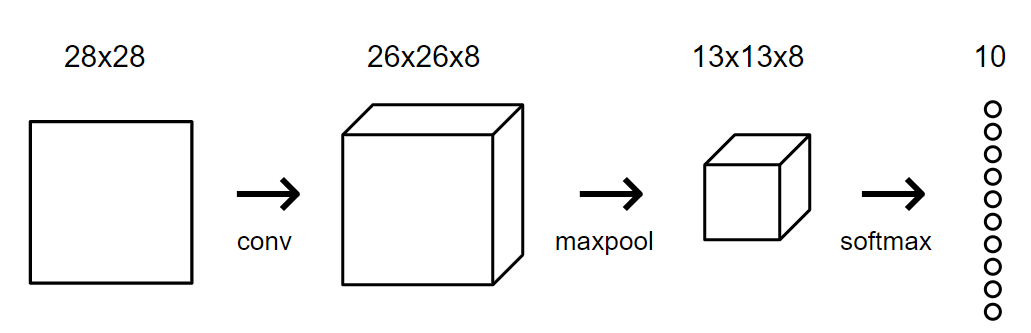

In [11]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(25, (3, 3), activation='relu', input_shape=(28, 28, 1))) # adding convolution layer with 25 filters with 3 x 3 kernels
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2161 - accuracy: 0.9339
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0732 - accuracy: 0.9778
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0531 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0419 - accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0340 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0274 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0166 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [12]:
model.summary() # gives summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [13]:
model.evaluate(x_test, y_test) # Evaluates accuracy on test dataset image

313/313 [==============================] - 2s 5ms/step - loss: 0.0485 - accuracy: 0.9884


[0.04853604733943939, 0.9883999824523926]

In [34]:
import cv2
import numpy as np
im=cv2.imread('five.jpeg',0) # Take image from mobile camera and upload that image file here
img=cv2.imread('five.jpeg',0)
im=im/255
img=img/255
down_width = 28
down_height = 28
down_points = (down_width, down_height)
im1 = cv2.resize(im, down_points, interpolation= cv2.INTER_LINEAR)
img1 = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)
im2=im1.reshape(28,28,1)
img2=img1.reshape(28,28,1)
cv2.imshow('image',im2)
cv2.waitKey(0)
cv2.imshow('im',img2)
cv2.waitKey(0)
im2.shape
img2.shape
a=np.array([im2,img2]) # To create testing array
#print(a)
a[1].shape
a=a.reshape(-1,28,28,1)
a.shape




(2, 28, 28, 1)

In [35]:
model.predict(a) # Predicts probablity of each class

1/1 [==============================] - 0s 17ms/step


array([[0.03698247, 0.04819279, 0.05355204, 0.11326447, 0.02405743,
        0.35810506, 0.19012076, 0.02431077, 0.13171954, 0.01969468],
       [0.03698247, 0.04819279, 0.05355204, 0.11326447, 0.02405743,
        0.35810506, 0.19012076, 0.02431077, 0.13171954, 0.01969468]],
      dtype=float32)

In [36]:
np.argmax(model.predict(a)) # Gives highest probablity class

1/1 [==============================] - 0s 30ms/step


5

In [54]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow numpy mnist

  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

